## 일표본 평균(수치) 차이분석 ==> t.test

In [1]:
# -*- coding: utf-8 -*-
#컨벤션
%matplotlib inline
from pandas import DataFrame, Series
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels
import math

In [2]:
#skipinitialspace 컬럼의 빈칸 없애고 전체 자료 읽어 들이기
my_df = pd.read_csv('coupon.csv', skipinitialspace=True)

In [3]:
#변수 확인
print(my_df.head())
print(my_df.tail())
print(my_df.info())
print(my_df.describe())

   no  type  category   amount  week
0   1     1       4.0  99300.0   1.0
1   2     1       2.0  98300.0   1.0
2   4     2       NaN      NaN   NaN
3   6     1       NaN      NaN   NaN
4   9     2       NaN      NaN   NaN
      no  type  category    amount  week
196  295     2       NaN       NaN   NaN
197  296     2       NaN       NaN   NaN
198  298     2       NaN       NaN   NaN
199  299     2       4.0  152400.0   1.0
200  300     2       1.0   37600.0   0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 5 columns):
no          201 non-null int64
type        201 non-null int64
category    117 non-null float64
amount      117 non-null float64
week        117 non-null float64
dtypes: float64(3), int64(2)
memory usage: 7.9 KB
None
               no        type    category         amount        week
count  201.000000  201.000000  117.000000     117.000000  117.000000
mean   149.323383    1.437811    2.495726   86906.837607    0.555556
std  

In [4]:
#서브셋 데이터 생성
np.isnan(my_df.amount).value_counts(normalize=False, sort=False)

False    117
True      84
Name: amount, dtype: int64

In [5]:
sb_df = my_df[my_df.amount.notnull()]
sb_df.head()

,no,type,category,amount,week
0,1,1,4.0,99300.0,1.0
1,2,1,2.0,98300.0,1.0
5,10,2,3.0,40900.0,0.0
6,11,1,3.0,76400.0,1.0
7,13,1,2.0,83800.0,1.0


(array([11.,  8., 21., 24., 18., 13.,  6.,  7.,  5.,  4.]),
 array([ 18500.,  35390.,  52280.,  69170.,  86060., 102950., 119840.,
        136730., 153620., 170510., 187400.]),
 <a list of 10 Patch objects>)

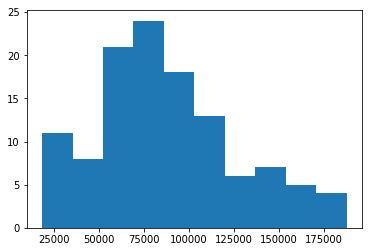

In [6]:
#정규성 검토
plt.figure(0)
plt.hist(sb_df.amount, bins=10)

In [7]:
stats.skew(sb_df.amount)

0.49569368445737744

In [8]:
#stats.kstest(sb_df.amount, 'norm')
stats.shapiro(sb_df.amount)

(0.9684169888496399, 0.007360493764281273)

In [9]:
#정규화 처리
sb_df_ln = [math.log(x) for x in sb_df.amount]
sb_df_ln

[11.505900850033264,
 11.495779306135258,
 10.618885342030893,
 11.243737975154612,
 11.336188286470174,
 11.951180395901384,
 11.540540632003202,
 11.37366339763672,
 10.973357372338583,
 11.205040685200927,
 11.388495386592052,
 10.742897240074326,
 11.020267145159687,
 12.14100064878646,
 11.390757830996021,
 11.45741275503997,
 11.89886790658953,
 11.712595660098795,
 11.319340715897564,
 11.701063407085623,
 11.854385243102481,
 12.028141437037512,
 11.580584113444043,
 11.687718755343392,
 10.675907913990581,
 11.085214747914744,
 10.927735425915376,
 9.862665558015873,
 11.32418334037335,
 11.069758489678053,
 11.007087382715277,
 11.061939841560255,
 11.582451527618838,
 9.93788897925346,
 11.144756141605761,
 10.364071959865372,
 11.842948377911535,
 11.540540632003202,
 10.494048144320972,
 11.571194373094205,
 11.923046384614587,
 10.902279505922026,
 11.05089000537367,
 11.195471234184778,
 10.74073507706983,
 10.680516217076775,
 11.643076149435274,
 11.54925739421762,
 11

(array([ 5.,  2.,  5.,  7.,  5., 24., 26., 19., 13., 11.]),
 array([ 9.82552601, 10.05707347, 10.28862094, 10.5201684 , 10.75171587,
        10.98326333, 11.21481079, 11.44635826, 11.67790572, 11.90945319,
        12.14100065]),
 <a list of 10 Patch objects>)

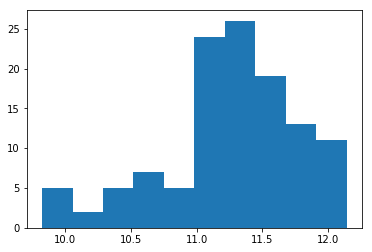

In [10]:
#정규성 확인
plt.figure(1)
plt.hist(sb_df_ln, bins=10)

In [11]:
stats.skew(sb_df_ln)

-0.7614508853170815

In [12]:
#stats.kstest(sb_df_ln, 'norm')
stats.shapiro(sb_df_ln)

(0.9507076144218445, 0.00029612972866743803)

In [14]:
#일표본 평균차이 검정
x = stats.ttest_1samp(sb_df.amount, 62000)
print("원자료 일때: t-value = %4.3f, p-value = %4.3f\n" % (x.statistic, x.pvalue))

y = stats.ttest_1samp(sb_df_ln, 62000)
print("로그정규화 일때: t-value = %4.3f, p-value = %4.3f" % (y.statistic, y.pvalue))

원자료 일때: t-value = 6.893, p-value = 0.000

로그정규화 일때: t-value = -1303771.165, p-value = 0.000


## end of documents